In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import sys
import os
import cmocean
import cmocean.cm as cmo

In [21]:
os.path.exists

<function genericpath.exists(path)>

In [22]:
basic_wds = [1e-3,1e-2,1e-1,1.0,10.,100.]
equiv_wds = [1e-2,1e-3,1e-4,1e-5]
results = []
results = pd.DataFrame()
for basic_idx, basic_wd in enumerate(basic_wds):
    for equiv_idx, equiv_wd in enumerate(equiv_wds):
        fname = "inertia_log_MixedEMLP_basic" + str(basic_wd) + "_equiv" + str(equiv_wd) + ".pkl"
        if os.path.exists("./saved-outputs/" + fname):
            df = pd.read_pickle("./saved-outputs/" + fname)
            if basic_wd == 0.:
                df['basic_wd'] = 1e-7
            else:
                df['basic_wd'] = basic_wd
            if equiv_wd == 0.:
                df['equiv_wd'] = 1e-7
            else:
                df['equiv_wd'] = equiv_wd
            
            results = pd.concat((results, df))

results.columns = ['trial', 'tr_loss', 'te_loss', 'basic_wd', 'equiv_wd']

In [23]:
results['log_basic'] = np.log10(results['basic_wd'])
results['log_equiv'] = np.log10(results['equiv_wd'])
# results = results.replace(to_replace=-7, value=r'-inf')

results["equiv_hue"] = ["$%s$" % x for x in results["log_equiv"]]
results["basic_hue"] = ["$%s$" % x for x in results["log_basic"]]

In [24]:
results[results['te_loss'] > 10.] = None

<Figure size 900x600 with 0 Axes>

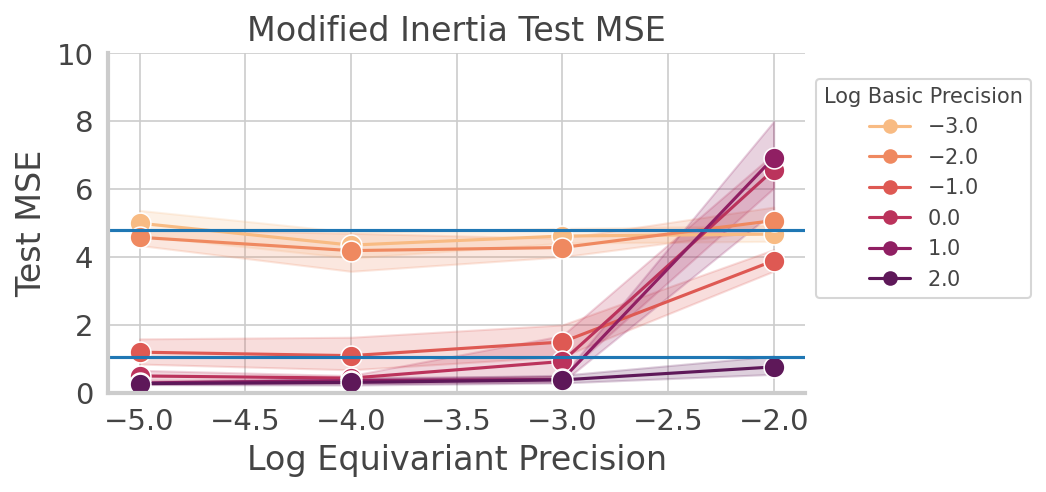

In [25]:

ncolor = 6
lightcmap = cmocean.tools.crop_by_percent(cmo.matter, ncolor, which='min', N=None)
cpal = sns.color_palette("cmo.matter", n_colors=ncolor)#, desat=0.2)

fs = 16
sns.set_style("whitegrid")

COLOR = '#444444'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

plt.figure(dpi=150)
# sns.lineplot(x='log_equiv', y='te_loss', hue='basic_hue', data=results[results['log_basic'] < -1.],
#             palette='RdYlBu')

fig, ax = plt.subplots(dpi=150, figsize=(6, 3))
sns.lineplot(x='log_equiv', y='te_loss', data=results,
        hue='basic_hue', markers=['o' for _ in range(ncolor)],
             style='basic_hue', dashes=False, markersize=10,
                ax=ax, palette=cpal)

ax.legend(loc='lower left', title='Log Basic Precision', bbox_to_anchor=(1., 0.25))
ax.set_xlabel("Log Equivariant Precision", fontsize=fs)
ax.set_ylabel("Test MSE", fontsize=fs)
ax.set_title("Modified Inertia Test MSE", fontsize=16)
plt.ylim(0, 10)
# ax.set_xlim(-7, -1)
# ax.set_xticklabels([r"-$\infty$", -6, -5, -4, -3, -2, -1])
ax.tick_params('both', labelsize=fs-2)
ax.axhline(4.791855)
ax.axhline(1.053696)
sns.despine()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2.)
    
plt.savefig("./figs/inertia_equiv_wd.pdf", bbox_inches='tight')
plt.show()

In [26]:
results.log_basic.unique()

array([-3., -2., -1., nan,  0.,  1.,  2.])

In [27]:
equiv_wd = 0.001
basic_wd = 100.0

fname = "./saved-outputs/inertia_log_mlp_basic" + str(basic_wd)
fname = fname + "_equiv" + str(equiv_wd) + ".pkl"

mlp = pd.read_pickle(fname)

In [28]:
mlp.mean()

0    4.500000
1    0.033824
2    4.791855
dtype: float64

In [29]:
equiv_wd = 0.001
basic_wd = 100.0

fname = "./saved-outputs/inertia_log_emlp_basic" + str(basic_wd)
fname = fname + "_equiv" + str(equiv_wd) + ".pkl"

emlp = pd.read_pickle(fname)

In [30]:
emlp.mean()

0    4.500000
1    0.623557
2    1.053696
dtype: float64